In [74]:
import numpy
from matplotlib import pyplot
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [41]:
def plot_3D(x, y, u):
    '''Creates 3D plot with appropriate limits and viewing angle
    
    Parameters:
    ----------
    x: array of float
        nodal coordinates in x
    y: array of float
        nodal coordinates in y
    u: 2D array of float
        calculated potential field
    
    '''
    fig = pyplot.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    X,Y = numpy.meshgrid(x,y)
    surf = ax.plot_surface(X,Y,u[:], rstride=1, cstride=1, cmap=cm.viridis,
            linewidth=0, antialiased=False)

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')
    ax.set_zlabel('$z$')
    ax.view_init(30,45)

In [42]:
def poisson_IG(n,nx):
    ny=nx
    dx = (1)/(nx-1)
    dy = (1)/(ny-1)
    
    x = numpy.linspace(0,1,nx)
    y = numpy.linspace(0,1,ny)
    X,Y=numpy.meshgrid(x,y)
    
    f = -8*numpy.pi**2*n**2*numpy.cos(2*numpy.pi*n*Y)*numpy.cos(2*numpy.pi*n*X)
    
    u_i = numpy.zeros((ny,nx))    #initial guess
    
    return X,Y,x,y,u_i,f,dx,dy

In [53]:
def poisson_jacobi(u,f,dx,dy,l2_target,u_e):
    l2_norm = 1
    iterations = 0
    l2_conv=[]
    
    while l2_norm > l2_target:
        ud = u.copy()
        #discretization with jacobi relaxation
        u[1:-1,1:-1] = 0.25 * (ud[1:-1,2:] + ud[1:-1,:-2] + ud[2:,1:-1] + ud[:-2,1:-1] - f[1:-1,1:-1]*dx**2)
        
        #use u_exact to set neumann BC
        u[1:-1,0] = u_e[1:-1,0]
        u[1:-1,-1] = u_e[1:-1,-1]
        u[0,1:-1] = u_e[0,1:-1]
        u[-1,1:-1] = u_e[-1,1:-1]
        #corners
        u[0,0]=u_e[0,0]
        u[0,-1]=u_e[0,-1]
        u[-1,-1]=u_e[-1,-1]
        u[-1,0]=u_e[-1,0]
        
        l2_norm = L2_error(u,ud)
        iterations+=1
        l2_conv.append(l2_norm)
        
    print("Jacobi method took {} iterations\
 at tolerance {} with nx = {}".format(iterations, l2_target,nx))
        
    return u,l2_conv

In [48]:
def u_exact(n,X,Y):
    return numpy.cos(2*numpy.pi*n*X)*numpy.cos(2*numpy.pi*n*Y)

In [49]:
def L2_error(p, pn):
    return numpy.sqrt(numpy.sum((p - pn)**2)/numpy.sum(pn**2))

# (a) Jacobi
# n = 1

Jacobi method took 3525 iterations at tolerance 1e-08 with nx = 41


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


0.001676542990484082

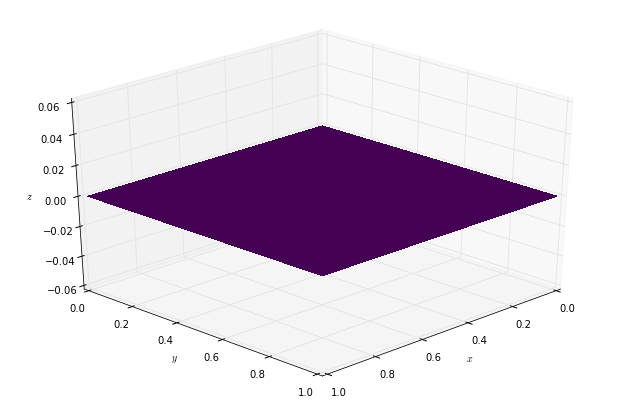

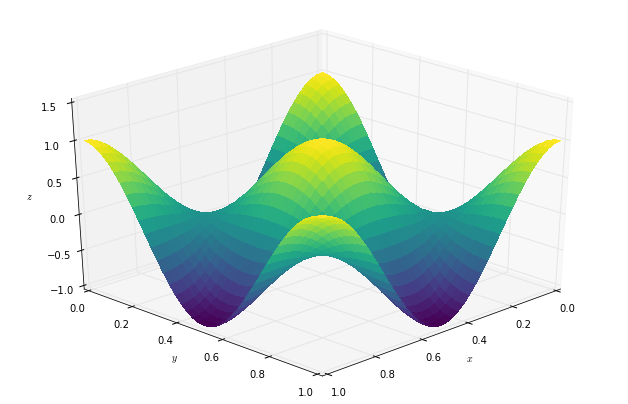

In [75]:
#initalize
nx = 41
ny = 41
n1 = 1    #n = (min(nx)-1)/2 range for n values, min nx = 11
X,Y,x,y,u_i,f,dx,dy = poisson_IG(n1,nx)

#check initial guess
plot_3D(x,y,u_i)
#calculate exact u
u_e= u_exact(n1,X,Y)
# set tolerance
l2_target = 1e-8

#iterate u values at each point on mesh grid
u, l2_convn1 = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)

#check final u
plot_3D(x,y,u)



#find error between calculated u and exact u
error=L2_error(u,u_e)
error

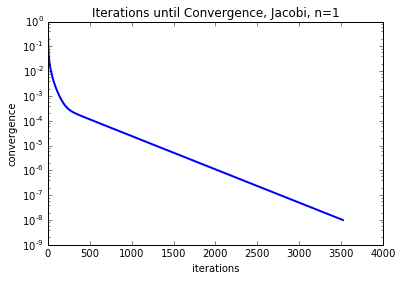

In [76]:
#plot number of iterations until convergence
pyplot.semilogy(numpy.arange(len(l2_convn1)),l2_convn1,lw=2)
pyplot.xlabel('iterations')
pyplot.ylabel('convergence')
pyplot.title('Iterations until Convergence, Jacobi, n=1');

Jacobi method took 272 iterations at tolerance 1e-08 with nx = 11
Jacobi method took 988 iterations at tolerance 1e-08 with nx = 21
Jacobi method took 3525 iterations at tolerance 1e-08 with nx = 41
Jacobi method took 12338 iterations at tolerance 1e-08 with nx = 81
Jacobi method took 18384 iterations at tolerance 1e-08 with nx = 101


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


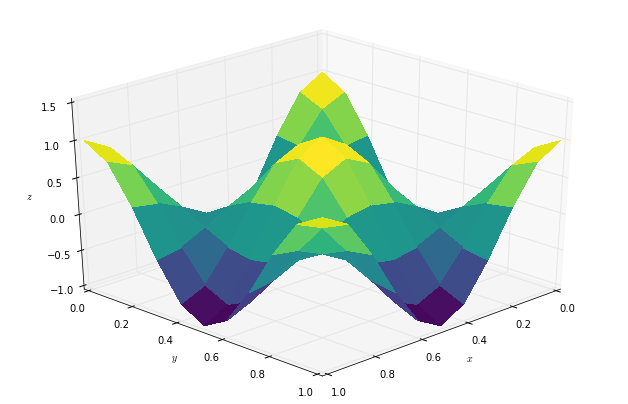

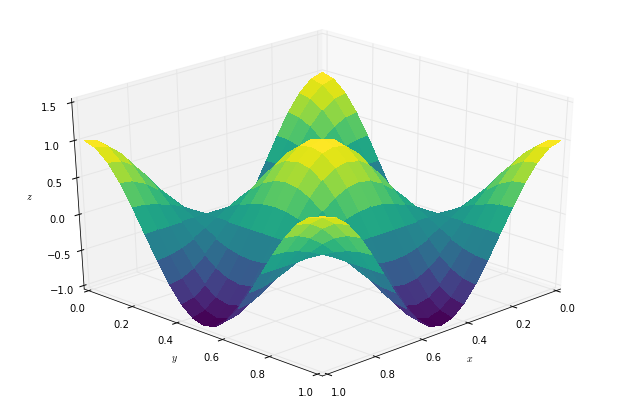

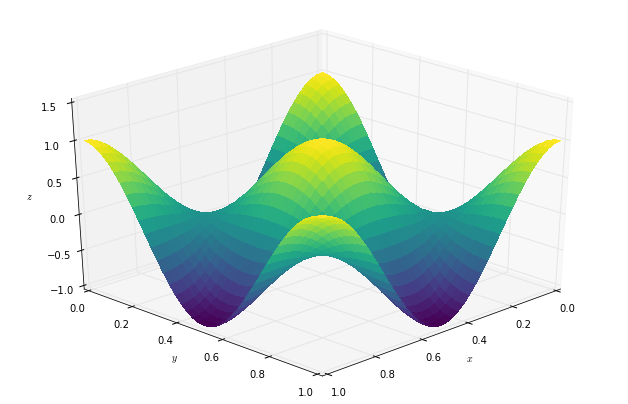

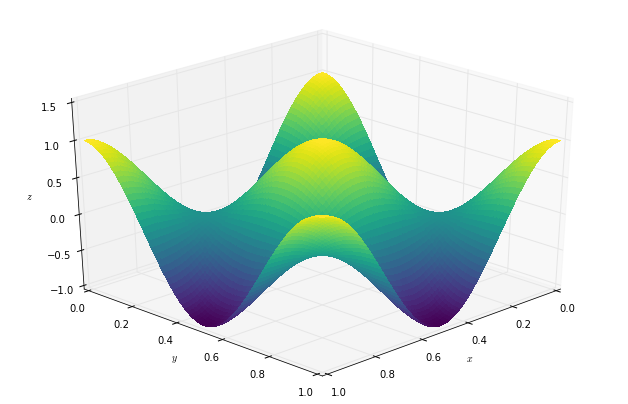

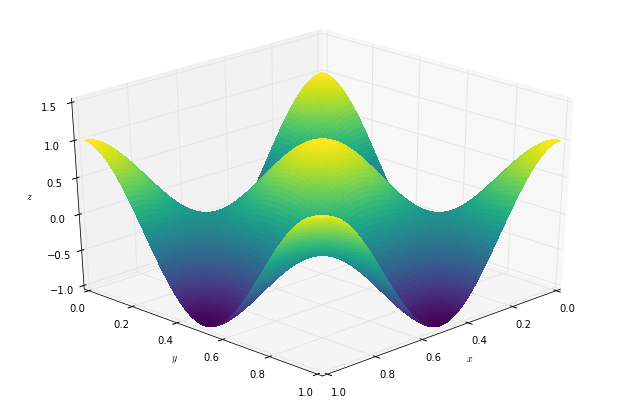

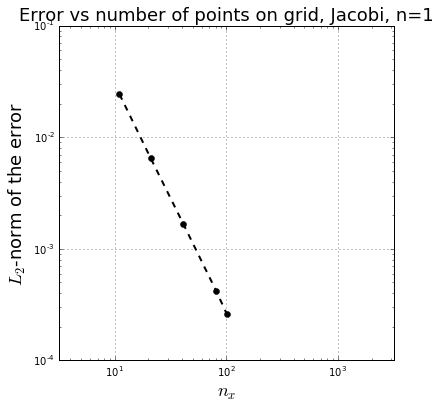

In [58]:
nx_val = [11,21,41,81,101]    #increase nx to see how error behaves with increased number of points
error_j_n1 = numpy.zeros_like(nx_val,dtype=numpy.float)
for i, nx in enumerate(nx_val):
    ny = nx
    X,Y,x,y,u_i,f,dx,dy=poisson_IG(n1,nx)
    u_e = u_exact(n1,X,Y)
    u,l2_conv = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)
    
    error_j_n1[i] = L2_error(u,u_e)
    plot_3D(x,y,u)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.title('Error vs number of points on grid, Jacobi, n=1', fontsize = 18)
pyplot.loglog(nx_val, error_j_n1, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');

In [59]:
error_j_n1

array([ 0.02429954,  0.00645412,  0.00167654,  0.00041848,  0.00025924])

# n = 2

Jacobi method took 2527 iterations at tolerance 1e-08 with nx = 41


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


0.0068323958463399762

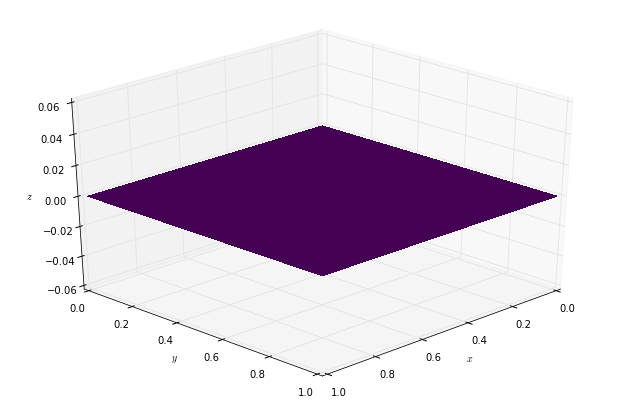

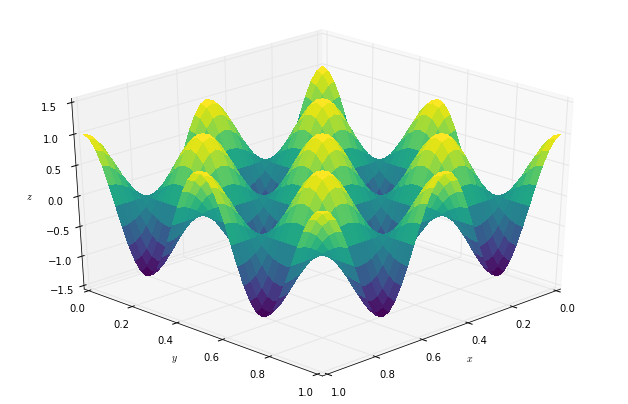

In [77]:
#initalize
nx = 41
ny = 41
n2 = 2
X,Y,x,y,u_i,f,dx,dy = poisson_IG(n2,nx)

#check initial guess
plot_3D(x,y,u_i)
#calculate exact u
u_e= u_exact(n2,X,Y)
# set tolerance
l2_target = 1e-8

#iterate u values at each point on mesh grid
u, l2_convn2 = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)

#check final u
plot_3D(x,y,u)

#find error between calculated u and exact u
error=L2_error(u,u_e)
error

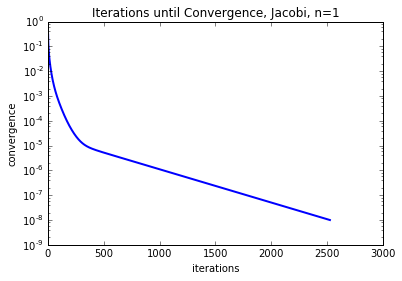

In [78]:
#plot number of iterations until convergence
pyplot.semilogy(numpy.arange(len(l2_convn2)),l2_convn2,lw=2)
pyplot.xlabel('iterations')
pyplot.ylabel('convergence')
pyplot.title('Iterations until Convergence, Jacobi, n=1');

Jacobi method took 236 iterations at tolerance 1e-08 with nx = 11
Jacobi method took 782 iterations at tolerance 1e-08 with nx = 21
Jacobi method took 2527 iterations at tolerance 1e-08 with nx = 41
Jacobi method took 8199 iterations at tolerance 1e-08 with nx = 81
Jacobi method took 11895 iterations at tolerance 1e-08 with nx = 101


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


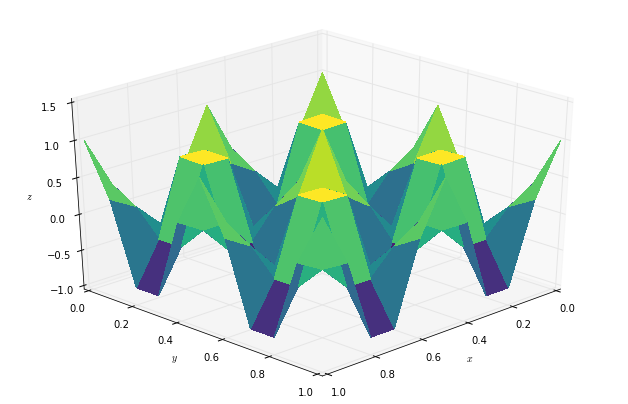

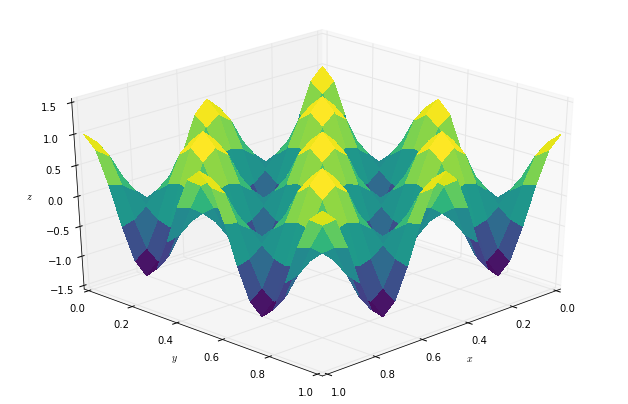

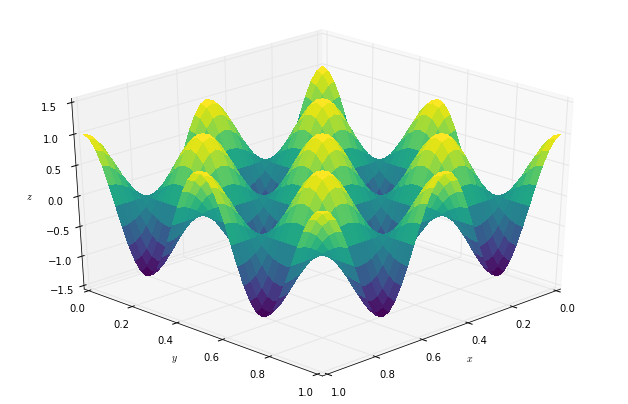

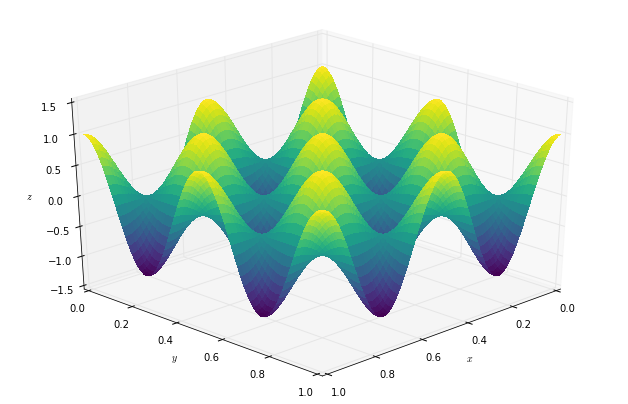

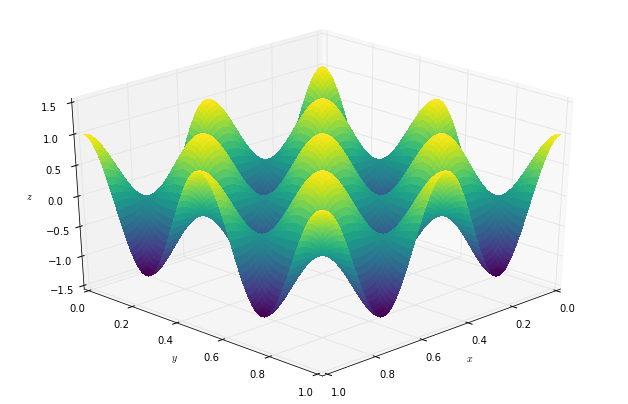

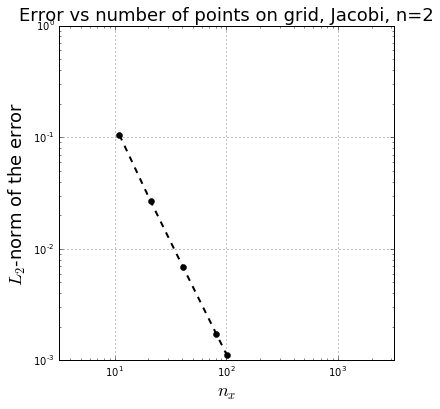

In [73]:
nx_val = [11,21,41,81,101]    #increase nx to see how error behaves with increased number of points
error_j_n2 = numpy.zeros_like(nx_val,dtype=numpy.float)
for i, nx in enumerate(nx_val):
    ny = nx
    X,Y,x,y,u_i,f,dx,dy=poisson_IG(n2,nx)
    u_e = u_exact(n2,X,Y)
    u,l2_conv = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)
    
    error_j_n2[i] = L2_error(u,u_e)
    plot_3D(x,y,u)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.title('Error vs number of points on grid, Jacobi, n=2', fontsize = 18)
pyplot.loglog(nx_val, error_j_n2, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');

# n = 3

Jacobi method took 2223 iterations at tolerance 1e-08 with nx = 41


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


0.016145828439776029

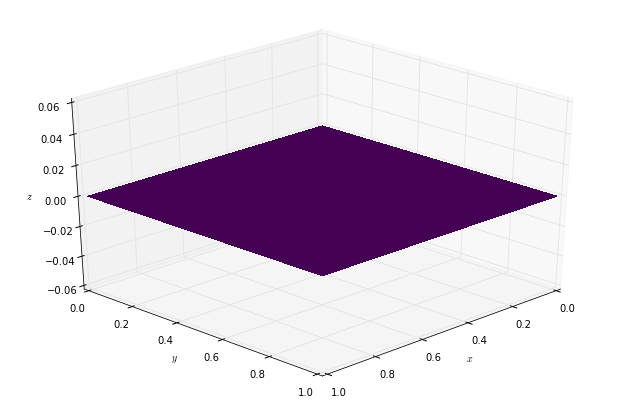

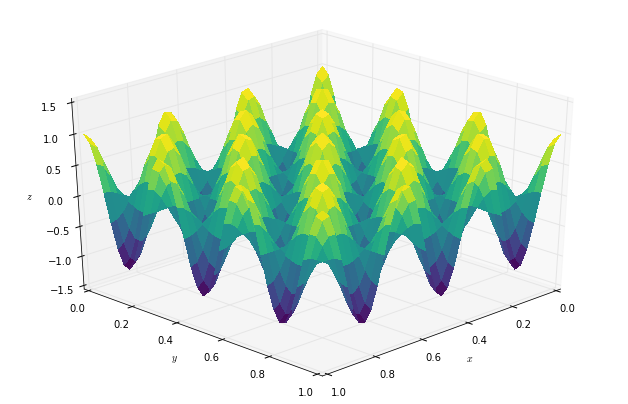

In [79]:
#initalize
nx = 41
ny = 41
n3 = 3
X,Y,x,y,u_i,f,dx,dy = poisson_IG(n3,nx)

#check initial guess
plot_3D(x,y,u_i)
#calculate exact u
u_e= u_exact(n3,X,Y)
# set tolerance
l2_target = 1e-8

#iterate u values at each point on mesh grid
u, l2_convn3 = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)

#check final u
plot_3D(x,y,u)

#find error between calculated u and exact u
error=L2_error(u,u_e)
error

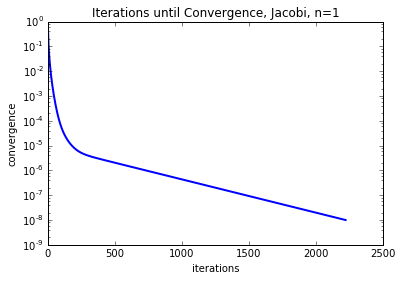

In [80]:
#plot number of iterations until convergence
pyplot.semilogy(numpy.arange(len(l2_convn3)),l2_convn3,lw=2)
pyplot.xlabel('iterations')
pyplot.ylabel('convergence')
pyplot.title('Iterations until Convergence, Jacobi, n=1');

Jacobi method took 270 iterations at tolerance 1e-08 with nx = 11
Jacobi method took 753 iterations at tolerance 1e-08 with nx = 21
Jacobi method took 2223 iterations at tolerance 1e-08 with nx = 41
Jacobi method took 6244 iterations at tolerance 1e-08 with nx = 81
Jacobi method took 8683 iterations at tolerance 1e-08 with nx = 101


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


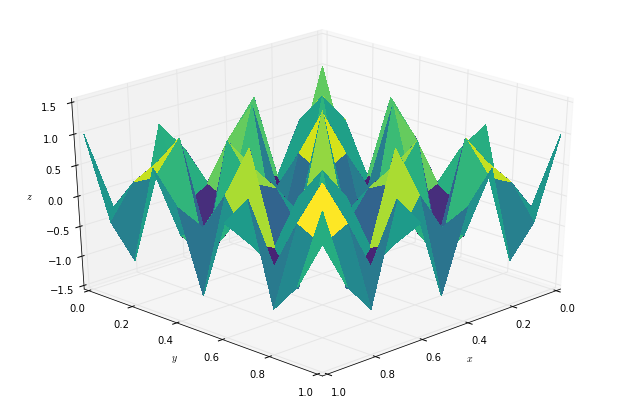

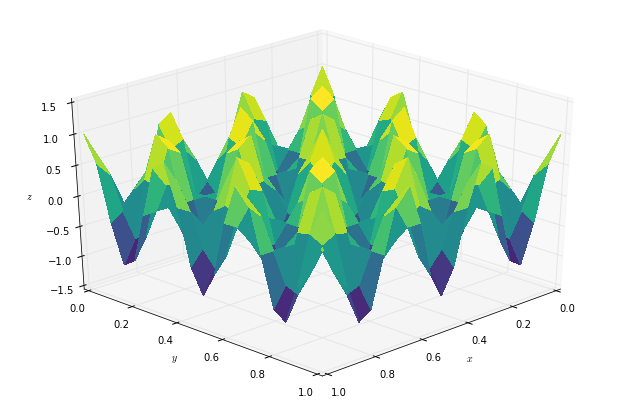

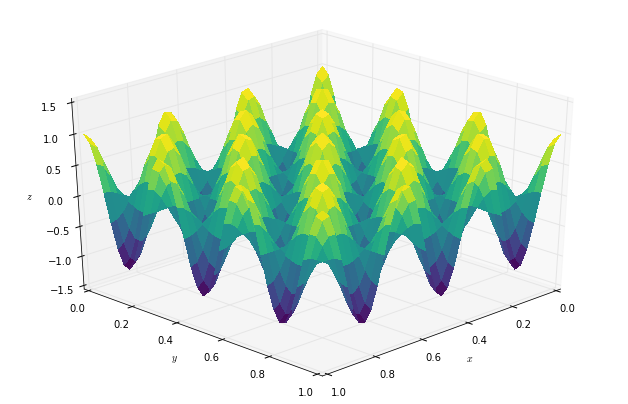

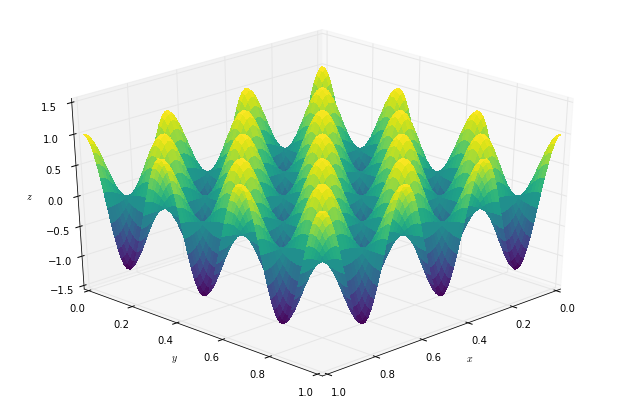

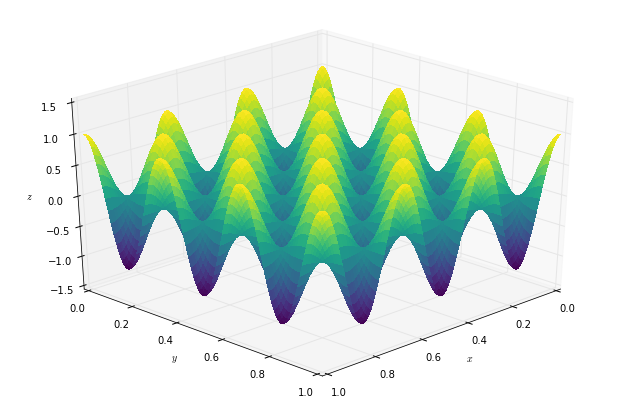

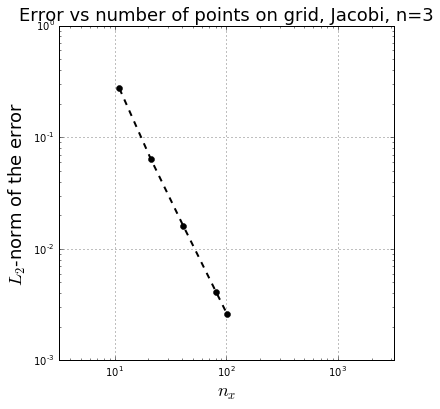

In [72]:
nx_val = [11,21,41,81,101]    #increase nx to see how error behaves with increased number of points
error_j_n3 = numpy.zeros_like(nx_val,dtype=numpy.float)
for i, nx in enumerate(nx_val):
    ny = nx
    X,Y,x,y,u_i,f,dx,dy=poisson_IG(n3,nx)
    u_e = u_exact(n3,X,Y)
    u,l2_conv = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)
    
    error_j_n3[i] = L2_error(u,u_e)
    plot_3D(x,y,u)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.title('Error vs number of points on grid, Jacobi, n=3', fontsize = 18)
pyplot.loglog(nx_val, error_j_n3, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');

# n = 4

Jacobi method took 2164 iterations at tolerance 1e-08 with nx = 41


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


0.029667273833494358

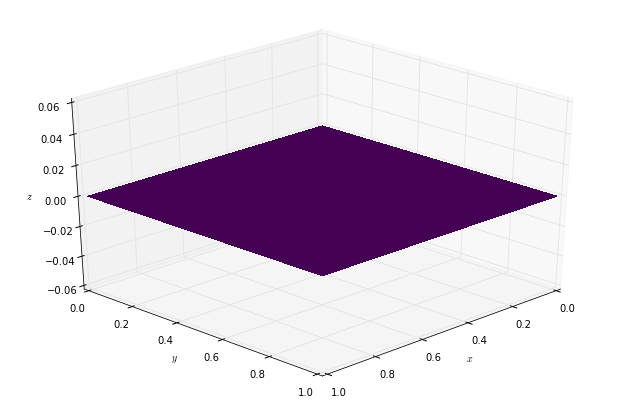

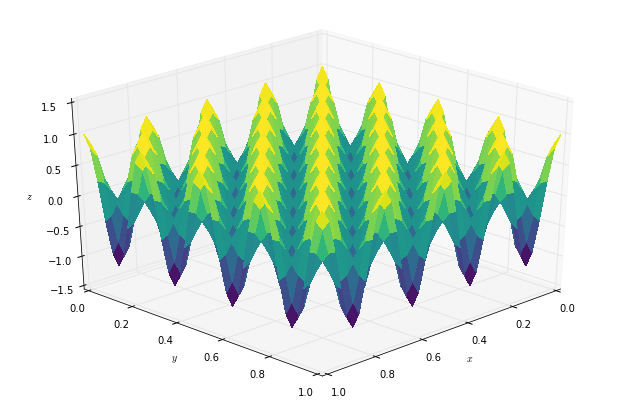

In [81]:
#initalize
nx = 41
ny = 41
n4 = 4
X,Y,x,y,u_i,f,dx,dy = poisson_IG(n4,nx)

#check initial guess
plot_3D(x,y,u_i)
#calculate exact u
u_e= u_exact(n4,X,Y)
# set tolerance
l2_target = 1e-8

#iterate u values at each point on mesh grid
u, l2_convn4 = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)

#check final u
plot_3D(x,y,u)

#find error between calculated u and exact u
error=L2_error(u,u_e)
error

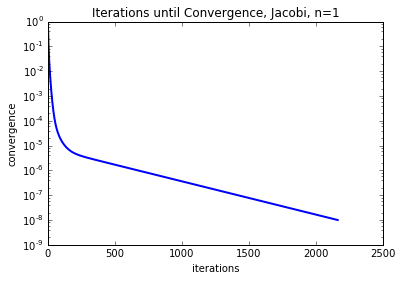

In [82]:
#plot number of iterations until convergence
pyplot.semilogy(numpy.arange(len(l2_convn4)),l2_convn4,lw=2)
pyplot.xlabel('iterations')
pyplot.ylabel('convergence')
pyplot.title('Iterations until Convergence, Jacobi, n=1');

Jacobi method took 346 iterations at tolerance 1e-08 with nx = 11
Jacobi method took 724 iterations at tolerance 1e-08 with nx = 21
Jacobi method took 2164 iterations at tolerance 1e-08 with nx = 41
Jacobi method took 5422 iterations at tolerance 1e-08 with nx = 81
Jacobi method took 7044 iterations at tolerance 1e-08 with nx = 101


/home/gil/anaconda3/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app


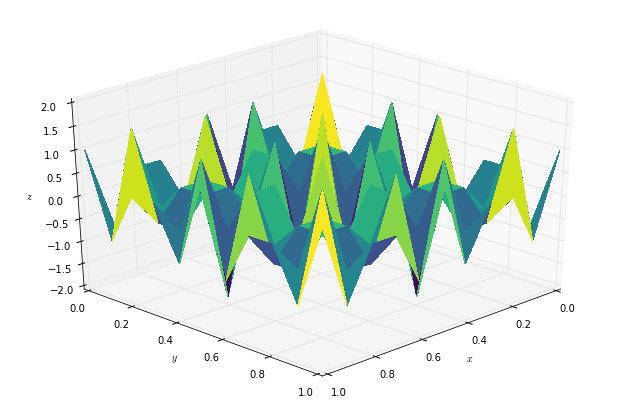

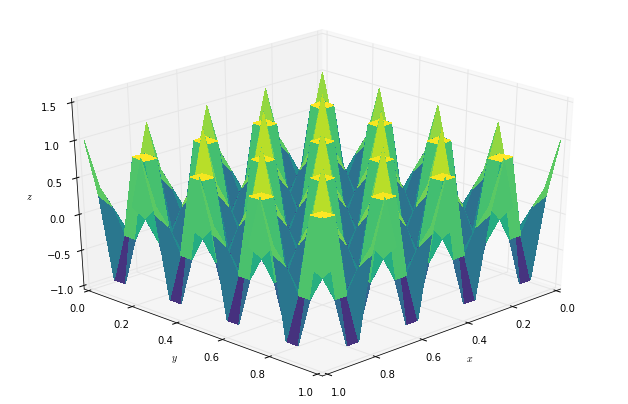

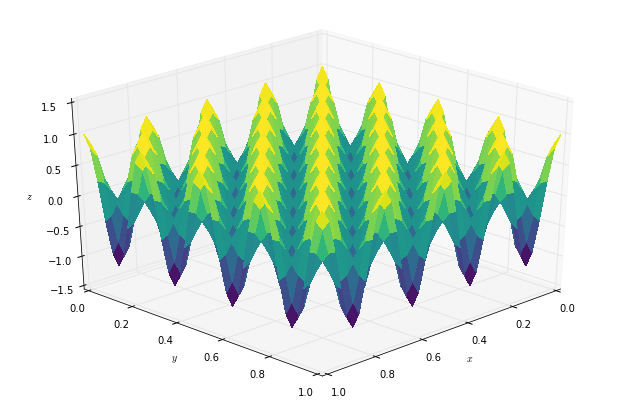

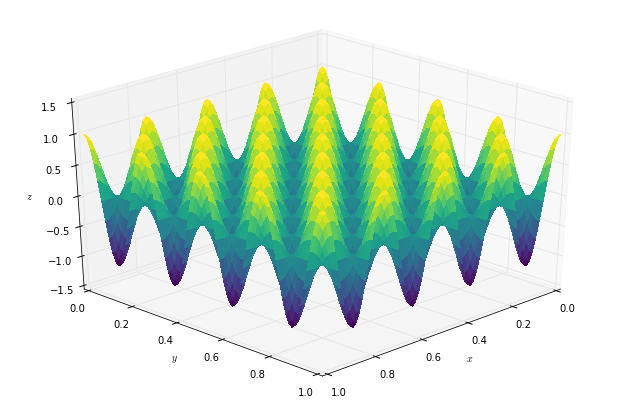

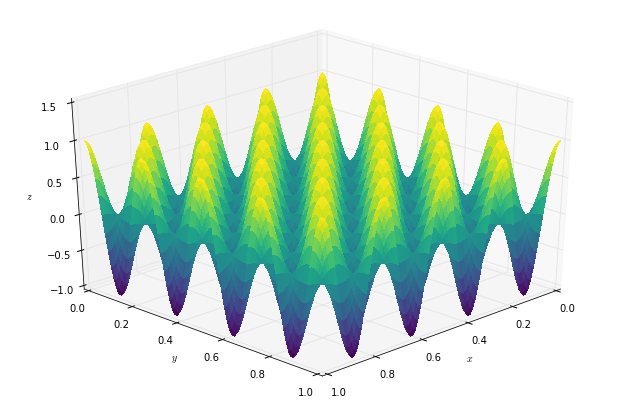

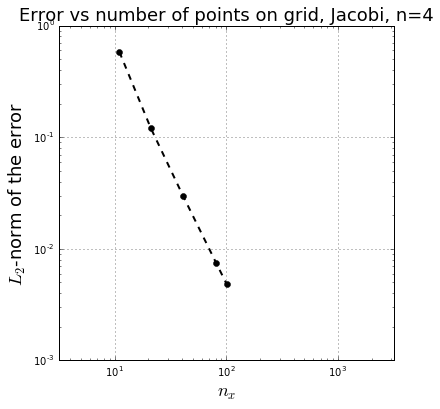

In [71]:
nx_val = [11,21,41,81,101]    #increase nx to see how error behaves with increased number of points
error_j_n4 = numpy.zeros_like(nx_val,dtype=numpy.float)
for i, nx in enumerate(nx_val):
    ny = nx
    X,Y,x,y,u_i,f,dx,dy=poisson_IG(n4,nx)
    u_e = u_exact(n4,X,Y)
    u,l2_conv = poisson_jacobi(u_i.copy(),f,dx,dy,l2_target,u_e)
    
    error_j_n4[i] = L2_error(u,u_e)
    plot_3D(x,y,u)
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.title('Error vs number of points on grid, Jacobi, n=4', fontsize = 18)
pyplot.loglog(nx_val, error_j_n4, color='k', ls='--', lw=2, marker='o')
pyplot.axis('equal');

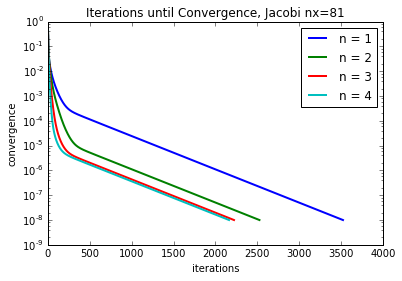

In [89]:
pyplot.semilogy(numpy.arange(len(l2_convn1)),l2_convn1,lw=2, label='n = 1')
pyplot.semilogy(numpy.arange(len(l2_convn2)),l2_convn2,lw=2, label='n = 2')
pyplot.semilogy(numpy.arange(len(l2_convn3)),l2_convn3,lw=2, label='n = 3')
pyplot.semilogy(numpy.arange(len(l2_convn4)),l2_convn4,lw=2, label='n = 4')
pyplot.xlabel('iterations')
pyplot.ylabel('convergence')
pyplot.title('Iterations until Convergence, Jacobi nx=81')
pyplot.legend()
pyplot.show();

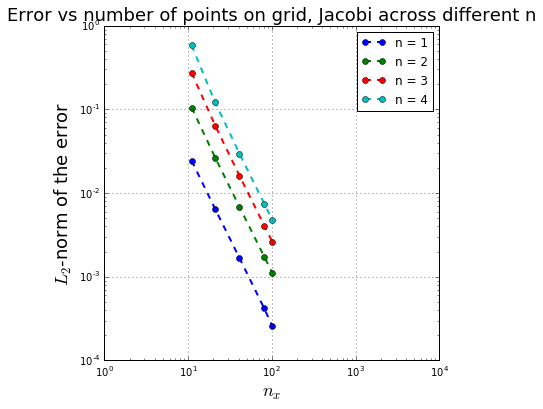

In [88]:
pyplot.figure(figsize=(6,6))
pyplot.grid(True)
pyplot.xlabel(r'$n_x$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of the error', fontsize=18)
pyplot.title('Error vs number of points on grid, Jacobi across different n', fontsize = 18)
pyplot.loglog(nx_val, error_j_n1, ls='--', lw=2, marker='o', label='n = 1')
pyplot.loglog(nx_val, error_j_n2, ls='--', lw=2, marker='o', label='n = 2')
pyplot.loglog(nx_val, error_j_n3, ls='--', lw=2, marker='o', label='n = 3')
pyplot.loglog(nx_val, error_j_n4, ls='--', lw=2, marker='o', label='n = 4')
pyplot.legend()
pyplot.axis('equal')
pyplot.show();